## **Title of the Project** : Hand Written Digit Prediction

-------------

## **Objective** 
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents. 

## **Data Source**

For my handwritten digit prediction project, I utilized the YBI Foundation database. This dataset comprises a comprehensive collection of labeled images representing handwritten digits from 0 to 9. The YBI Foundation database is particularly valuable due to its diversity and size, which provide a robust foundation for training machine learning models.

The dataset includes a wide range of handwriting styles, making it ideal for improving the model's ability to generalize across different digit representations. By leveraging this rich dataset, I was able to effectively train my model, ensuring it could accurately recognize and predict handwritten digits.

“In my project on handwritten digit prediction, I utilized the YBI Foundation database, which is a comprehensive collection of labeled images featuring handwritten digits. This dataset is particularly valuable due to its diversity and size, allowing for effective training of my model. I conducted preprocessing steps such as normalization and augmentation to enhance model performance. Ultimately, the trained model achieved a high accuracy on the test set, demonstrating the efficacy of using this rich dataset for digit recognition tasks.”

## **Import Library**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [57]:
from sklearn.datasets import load_digits


In [58]:
df=load_digits()

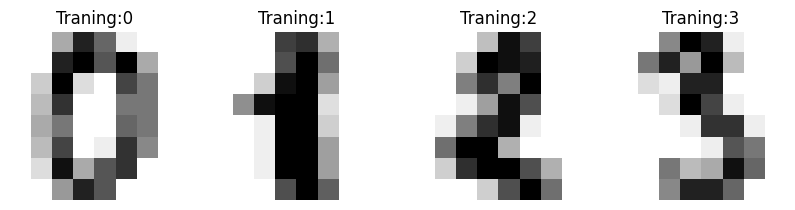

In [59]:
_ , axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Traning:%i"%label)

## **Data Preprocessing**

In [60]:
df.images.shape

(1797, 8, 8)

In [61]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [62]:
df.images[0].shape

(8, 8)

In [63]:
len(df.images)

1797

In [64]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [65]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [66]:
data[0].shape

(64,)

In [67]:
data.shape

(1797, 64)

## **Scaling Image Data** 


In [68]:
data.min()

np.float64(0.0)

In [69]:
data.max()

np.float64(16.0)

In [70]:
data=data/16

In [71]:
data.min()

np.float64(0.0)

In [72]:
data.max()

np.float64(1.0)

In [73]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier()

In [78]:
rf.fit(x_train,y_train)

RandomForestClassifier()

## **Prediction**

In [79]:
y_pred=rf.predict(x_test)

In [80]:
y_pred

array([5, 3, 3, 3, 8, 7, 5, 9, 4, 5, 0, 5, 5, 7, 6, 5, 5, 3, 9, 0, 3, 4,
       1, 9, 2, 9, 0, 2, 8, 9, 6, 8, 4, 5, 9, 1, 0, 7, 3, 1, 3, 1, 6, 7,
       6, 0, 5, 6, 5, 5, 9, 3, 9, 4, 8, 4, 1, 9, 0, 7, 9, 4, 7, 0, 2, 0,
       9, 9, 8, 4, 6, 6, 7, 4, 0, 5, 3, 5, 0, 6, 0, 1, 9, 5, 8, 3, 6, 2,
       3, 3, 5, 6, 2, 8, 9, 1, 9, 9, 5, 9, 0, 0, 8, 1, 0, 8, 4, 4, 9, 3,
       3, 6, 5, 3, 7, 1, 1, 4, 3, 8, 4, 7, 0, 1, 6, 1, 6, 9, 8, 1, 9, 6,
       8, 9, 0, 5, 1, 0, 7, 4, 6, 8, 5, 4, 8, 2, 2, 2, 7, 5, 3, 7, 5, 6,
       9, 3, 0, 5, 5, 7, 2, 7, 4, 9, 8, 9, 6, 3, 3, 2, 3, 3, 3, 0, 5, 2,
       0, 0, 9, 7, 3, 0, 0, 9, 1, 6, 3, 0, 6, 1, 9, 4, 0, 6, 6, 1, 4, 2,
       9, 4, 4, 1, 5, 1, 4, 2, 8, 5, 8, 0, 7, 3, 2, 7, 9, 8, 3, 8, 5, 5,
       4, 7, 3, 8, 6, 7, 7, 2, 5, 6, 4, 4, 8, 5, 8, 5, 8, 7, 0, 6, 0, 9,
       7, 6, 7, 0, 1, 7, 0, 3, 7, 5, 3, 1, 1, 6, 7, 1, 3, 9, 5, 1, 8, 9,
       8, 0, 9, 8, 9, 0, 8, 5, 0, 1, 5, 3, 5, 7, 0, 8, 1, 6, 5, 1, 0, 3,
       2, 9, 9, 0, 5, 4, 9, 0, 4, 3, 9, 8, 8, 7, 1,

## **Model Accuracy**

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
confusion_matrix(y_test,y_pred)

array([[57,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 62,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  1, 61]])

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.97      1.00      0.98        57
           2       0.98      1.00      0.99        40
           3       0.98      0.97      0.98        62
           4       1.00      1.00      1.00        48
           5       0.94      0.97      0.95        64
           6       1.00      0.96      0.98        51
           7       0.98      1.00      0.99        45
           8       0.96      0.96      0.96        50
           9       0.98      0.92      0.95        66

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Explaination**

Accuracy of my model on the test set is  98%